This notebook will use cartopy to plot Tromsøflaket bathy and coastline.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from netCDF4 import Dataset

import matplotlib.pyplot as plt
from scipy import interpolate
import cmocean
import matplotlib.image as mpimg
import cartopy.crs as ccrs
import cartopy


In [2]:
import cartopy.feature as cfeature

In [3]:
tromsø_lon = 18.9553
tromsø_lat = 69.6492

In [4]:
fname_topo = "C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/NordNorgeTopo_tromsoflaket.xlsx"

In [5]:
def load_bathy(fname_topo):
    """Load and grid bathymetry data from Tromsoflaket. Subsample chosen from NordNorgeTopo.txt in plot_contour_Tromsoflaker.ipynb
    :arg fname_topo path and file name of topo file. Excel file with 3 columns, lats, lons and bathy.
    
    :return grided X, Y and Z_mask
    
    """
    bathy_df = pd.read_excel(fname_topo, usecols=['lats', 'lons', 'bathy'])
    lats = bathy_df.lats
    lons = bathy_df.lons
    bathy = bathy_df.bathy

    # Establish grid
    x = np.arange(np.min(lons),np.max(lons),0.01)
    y = np.arange(np.min(lats),np.max(lats),0.01)
    X, Y = np.meshgrid(x, y)

    # interpolate bathy on grid.
    Z = interpolate.griddata((lons,lats), bathy, (X,Y) ,method='linear')

    # Mask land
    Z_mask = np.ma.masked_less(Z,0.1)
    return X, Y, Z_mask

In [63]:
def plot_tromsoflaket(
    axes, fname_topo, projection,
    extent=[15.80, 19.75, 67, 72.20]):
    """plot the coastline contour of Tromsøflaket with Tromsø sentrum indicated
    :arg axes Axes instance to plot the coastline on.
    :type axes 'matplotlib.axes.Axes'
    
    :arg extent extent of the map [lon_min, lon_max, lat_min, lat_max]. Default to cover Tromsøflaket region.
    :type extent numpy.ndarray
    """
    
    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='black',
                                        facecolor=cfeature.COLORS['land'])
    # create map
    ax = plt.subplot(1,1,1,projection=projection)
    ax.gridlines(draw_labels=True)
    ax.set_extent(extent, crs=projection)

    
    # Add depth contour
    X, Y, Z_mask = load_bathy(fname_topo)
    im = ax.contourf(X,Y,Z_mask,transform=projection, cmap=cmocean.cm.dense)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('Depth (m)', fontsize=14)
    
    ax.coastlines(resolution='10m')
    ax.add_feature(land_10m)
    
    plt.plot(tromsø_lon, tromsø_lat, 'r*',transform=projection, markersize=14)
    plt.text(tromsø_lon+0.1, tromsø_lat-0.05, 'Tromsø', transform=projection, fontsize=16, color = 'k')
    
    return ax

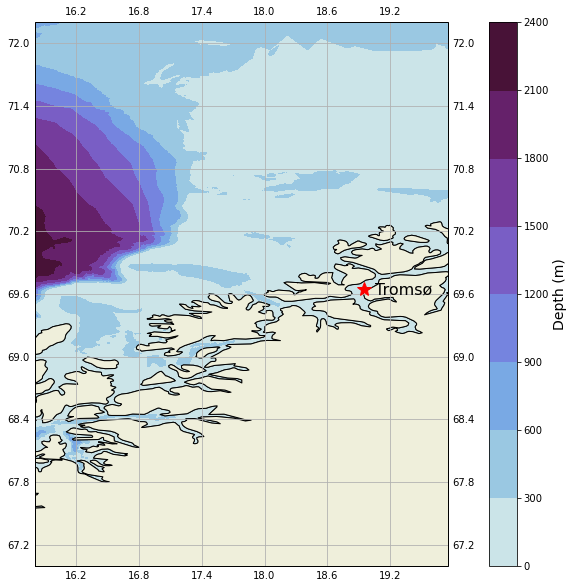

In [64]:
fname_topo = "C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/NordNorgeTopo_tromsoflaket.xlsx"

fig = plt.figure(figsize=(15,10))
ax = plot_tromsoflaket(fig, fname_topo, projection=ccrs.PlateCarree())